# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import zipfile
from io import BytesIO
from downcast import reduce
import plotly_express as px
import matplotlib.pyplot as plt
import seaborn as sns
from cstm_pkg_grp_9.features.plots import create_countplot, create_pie_chart, create_corr_matrix, histogram_boxplot
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import os
import json

In [105]:
pip install -i https://test.pypi.org/simple/ cstm_pkg_grp_9

Looking in indexes: https://test.pypi.org/simple/
  Using cached https://test-files.pythonhosted.org/packages/18/55/d605e2c8b11f79da2ad989a46f8fee53e144d3f9d4239b59e19a8c856837/cstm_pkg_grp_9-2024.0.1.4-py3-none-any.whl.metadata (1.1 kB)
Using cached https://test-files.pythonhosted.org/packages/18/55/d605e2c8b11f79da2ad989a46f8fee53e144d3f9d4239b59e19a8c856837/cstm_pkg_grp_9-2024.0.1.4-py3-none-any.whl (6.0 kB)
Note: you may need to restart the kernel to use updated packages.


# Loading data

The files are present in a folder which is compressed as a zip file. This folder will be decompressed and each file will be read as a specific dataframe for analysis.

In [2]:
# Path to the zip file
zip_file_path = '../../data/raw/dataset.zip'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:

    # Loop through each file in the zip
    for file_name in zip_ref.namelist():
        # Verifying if the file is a csv
        if file_name.endswith('.csv') and not file_name.startswith('__MACOSX') and not file_name.startswith('._'):
            # Read the CSV file directly into a pandas DataFrame
            with zip_ref.open(file_name) as csv_file:
                # Use the file name (without the .csv extension) as the key
                df_name = file_name.split('.')[0].replace('.csv', '')
                print(df_name)
                globals()[df_name] = pd.read_csv(csv_file)

calendar_events
calendar
items_weekly_sell_prices
sales_test
sales_train


# EDA

## Dataset Verification

Verifying the dataframes created from the csv files after unzipping

In [3]:
display(sales_train.head())
display(sales_train.shape)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1532,d_1533,d_1534,d_1535,d_1536,d_1537,d_1538,d_1539,d_1540,d_1541
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,1,0,1,0,1,0,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,8,2,0,8,2,3,1,1,3,8
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,0,1,3,2,1,1,2,2,3


(30490, 1547)

In [4]:
display(calendar.head())
display(calendar.shape)

,date,wm_yr_wk,d
0,2011-01-29,11101,d_1
1,2011-01-30,11101,d_2
2,2011-01-31,11101,d_3
3,2011-02-01,11101,d_4
4,2011-02-02,11101,d_5


(1969, 3)

In [5]:
display(calendar_events.head())
display(calendar_events.shape)

,date,event_name,event_type
0,2011-02-06,SuperBowl,Sporting
1,2011-02-14,ValentinesDay,Cultural
2,2011-02-21,PresidentsDay,National
3,2011-03-09,LentStart,Religious
4,2011-03-16,LentWeek2,Religious


(167, 3)

In [8]:
display(items_weekly_sell_prices.head())
display(items_weekly_sell_prices.shape)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


(6841121, 4)

In [9]:
display(sales_test.head())
display(sales_test.shape)

,d_1542,d_1543,d_1544,d_1545,d_1546,d_1547,d_1548,d_1549,d_1550,d_1551,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,0,1,0,2,1,0,2,0,1,0,...,2,4,0,0,0,0,3,3,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,1,2,1,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,4,1,0,1,3,5,2,3,0,2,...,1,1,0,4,0,1,3,0,2,6
4,3,0,0,1,1,0,2,0,2,1,...,0,0,0,2,1,0,0,2,1,0


(30490, 400)

The datasets are successfully verified and they contain the required data for further analysis.

# Helper Functions

In [10]:
def dataset_restructure(df, calendar_df, calendar_events_df, selling_price_df):
    # Reshape the data from wide to long format
    # id_vars are the columns that remain the same, 'd' represents days, 'units_sold' holds sales values
    df_long = pd.melt(df, id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'], 
                      var_name='d', value_name='units_sold')

    # Merge the reshaped sales data with the merged calendar data on 'd'
    df = df_long.merge(calendar_df, how='left', on='d')
    
    # Merge the result with selling price data on 'store_id', 'item_id', and 'wm_yr_wk'
    df_final = df.merge(selling_price_df, how='left', on=['store_id', 'item_id', 'wm_yr_wk'])

    df_final['sales_revenue'] = df_final['units_sold'] * df_final['sell_price']
    
    return df_final

In [36]:
def generate_bargraph(df, x_col, y_col, title='Bar Graph', xlabel='X-axis', ylabel='Y-axis', palette='Blues_d'):
    plt.figure(figsize=(8,6))
    ax = sns.barplot(x=x_col, y=y_col, data=df, palette=palette)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=0)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), 
                    textcoords='offset points', fontsize=10, color='black')
    plt.show()

In [53]:
def generate_linegraph_with_year(df, x_col, y_col, hue_col, title='Line Graph', xlabel='Year', ylabel='Sales Revenue ($)'):
    plt.figure(figsize=(10, 6))
    
    # Create a line plot using seaborn
    sns.lineplot(x=x_col, y=y_col, hue=hue_col, data=df, marker='o', palette='Set2')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Ensure the x-axis labels display the years correctly
    plt.xticks(df[x_col].unique(), rotation=45)  # Rotating for better visibility if needed
    
    plt.legend(title=hue_col)
    plt.tight_layout()
    plt.show()

In [61]:
def create_violin_plot(df, x_col, y_col, hue_col, title='Violin Plot', xlabel='Store', ylabel='Selling Price ($)', box_plot=True):
    """
    Create a violin plot to visualize the distribution of a numerical variable across categories.

    Parameters:
    - df: DataFrame containing the data
    - x_col: Column name for the x-axis (categorical variable)
    - y_col: Column name for the y-axis (numerical variable)
    - hue_col: Column name for the hue (additional categorical variable for color)
    - title: Title of the plot
    - xlabel: Label for the x-axis
    - ylabel: Label for the y-axis
    - box_plot: Boolean to show boxplot inside the violin (default is True)
    """
    plt.figure(figsize=(12, 6))
    
    # Create the violin plot
    sns.violinplot(data=df, x=x_col, y=y_col, hue=hue_col, split=False, inner='box' if box_plot else None)
    
    # Set plot titles and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title=hue_col)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [70]:
def missing_values_summary(df):
    """
    Generate a summary of missing values in a DataFrame.

    Parameters:
    - df: pandas DataFrame to analyze for missing values.

    Returns:
    - pandas DataFrame summarizing missing values and their percentages.
    """
    # Sum of missing values
    missed_val = df.isnull().sum()

    # Percentage of missing values
    percent_missed_val = 100 * df.isnull().sum() / len(df)

    # Merge the above created tables
    missed_val_table = pd.concat([missed_val, percent_missed_val], axis=1)

    # Filter for columns with missing values and sort
    missed_val_table = missed_val_table[missed_val_table.iloc[:, 1] != 0].sort_values(1, ascending=False).round(1)

    # Rename the columns
    missed_val_table_ren = missed_val_table.rename(columns={0: 'Missing Values', 1: '% Missing Values'})
    
    return missed_val_table_ren

# Data Pre-processing

## Data Restructuring

The initial step combines the dataset to extract relevant information since the end goal is to analyse each item's target variable sales revenue. The dataset_reconstruction function performs the required transformations to convert the data into the necessary structure. The steps followed in the function are:
1. Wide to long format conversion: The 'd' related features are changed to rows from columns to reduce the sparsity of the dataset. This results in the removal of 1541 features and the addition of two features: 'd' and 'units_sold'.
2. Merging subsets: Merged the sales data with calendar data to get the dates-related features. Merged this dataset again with a selling price subset to add the price for each item.
3. Sales Revenue: Generated the target variable sales revenue by multiplying units sold with selling price for each item on a particular day.

### Training set

In [11]:
train_df = 	dataset_restructure(sales_train, calendar, calendar_events, items_weekly_sell_prices)
train_df

,id,item_id,dept_id,cat_id,store_id,state_id,d,units_sold,date,wm_yr_wk,sell_price,sales_revenue
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
46985085,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1541,2,2015-04-18,11512,2.88,5.76
46985086,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1541,0,2015-04-18,11512,2.00,0.00
46985087,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1541,0,2015-04-18,11512,3.98,0.00
46985088,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1541,0,2015-04-18,11512,1.28,0.00


In [12]:
train_df.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd',
       'units_sold', 'date', 'wm_yr_wk', 'sell_price', 'sales_revenue'],
      dtype='object')

### Testing set

In [14]:
sales_test[['id','item_id','dept_id','cat_id','store_id','state_id']] = sales_train[['id','item_id','dept_id','cat_id','store_id','state_id']]

sales_test.head()

,d_1542,d_1543,d_1544,d_1545,d_1546,d_1547,d_1548,d_1549,d_1550,d_1551,...,d_1938,d_1939,d_1940,d_1941,id,item_id,dept_id,cat_id,store_id,state_id
0,0,1,0,2,1,0,2,0,1,0,...,3,3,0,1,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA
2,0,0,0,0,0,1,0,0,0,0,...,2,3,0,1,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA
3,4,1,0,1,3,5,2,3,0,2,...,3,0,2,6,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA
4,3,0,0,1,1,0,2,0,2,1,...,0,2,1,0,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA


In [15]:
test_df = dataset_restructure(sales_test, calendar, calendar_events, items_weekly_sell_prices)
test_df

,id,item_id,dept_id,cat_id,store_id,state_id,d,units_sold,date,wm_yr_wk,sell_price,sales_revenue
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1542,0,2015-04-19,11512,8.26,0.00
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1542,0,2015-04-19,11512,3.97,0.00
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1542,0,2015-04-19,11512,2.97,0.00
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1542,4,2015-04-19,11512,4.64,18.56
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1542,3,2015-04-19,11512,2.88,8.64
...,...,...,...,...,...,...,...,...,...,...,...,...
12195995,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1941,1,2016-05-22,11617,2.98,2.98
12195996,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1941,0,2016-05-22,11617,2.48,0.00
12195997,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1941,2,2016-05-22,11617,3.98,7.96
12195998,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1941,0,2016-05-22,11617,1.28,0.00


## Data Analysis

### Dataset understanding

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46985090 entries, 0 to 46985089
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id             object 
 1   item_id        object 
 2   dept_id        object 
 3   cat_id         object 
 4   store_id       object 
 5   state_id       object 
 6   d              object 
 7   units_sold     int64  
 8   date           object 
 9   wm_yr_wk       int64  
 10  sell_price     float64
 11  sales_revenue  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 4.2+ GB


In [16]:
train_df.describe()

,units_sold,wm_yr_wk,sell_price,sales_revenue
count,4.698509e+07,4.698509e+07,3.472069e+07,3.472069e+07
mean,1.086717e+00,1.128847e+04,4.383804e+00,4.101657e+00
std,3.933200e+00,1.207269e+02,3.358138e+00,1.046002e+01
min,0.000000e+00,1.110100e+04,1.000000e-02,0.000000e+00
25%,0.000000e+00,1.120400e+04,2.080000e+00,0.000000e+00
50%,0.000000e+00,1.130700e+04,3.440000e+00,0.000000e+00
75%,1.000000e+00,1.140900e+04,5.840000e+00,4.850000e+00
max,7.630000e+02,1.151200e+04,1.073200e+02,2.164320e+03


In [19]:
columns = ['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']
for col in columns:
    print(f"Column: {col}")
    print(train_df[col].value_counts())
    print("-" * 50) 

Column: item_id
item_id
HOBBIES_1_001      15410
FOODS_2_210        15410
FOODS_2_201        15410
FOODS_2_202        15410
FOODS_2_203        15410
                   ...  
HOUSEHOLD_1_464    15410
HOUSEHOLD_1_465    15410
HOUSEHOLD_1_466    15410
HOUSEHOLD_1_467    15410
FOODS_3_827        15410
Name: count, Length: 3049, dtype: int64
--------------------------------------------------
Column: dept_id
dept_id
FOODS_3        12682430
HOUSEHOLD_1     8198120
HOUSEHOLD_2     7936150
HOBBIES_1       6410560
FOODS_2         6133180
FOODS_1         3328560
HOBBIES_2       2296090
Name: count, dtype: int64
--------------------------------------------------
Column: cat_id
cat_id
FOODS        22144170
HOUSEHOLD    16134270
HOBBIES       8706650
Name: count, dtype: int64
--------------------------------------------------
Column: store_id
store_id
CA_1    4698509
CA_2    4698509
CA_3    4698509
CA_4    4698509
TX_1    4698509
TX_2    4698509
TX_3    4698509
WI_1    4698509
WI_2    4698509
WI_3  

In [18]:
distinct_item_ids = train_df['item_id'].unique().tolist()
distinct_items_dict = {"valid_item_ids":distinct_item_ids}

### Exploring variables of interest

#### State ID

The pie chart below shows that California has majority of the stores, followed by Texas and Wisconsin having the same proportion.

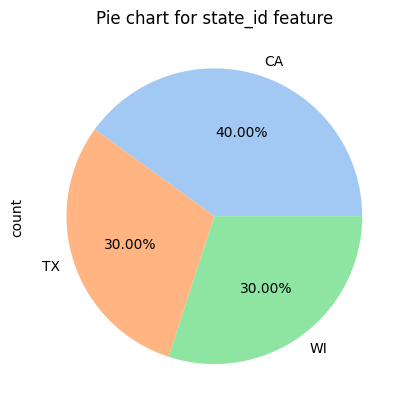

In [21]:
create_pie_chart(train_df, 'state_id')

The graph below mentions the store count for each state. The California has 4 stores which is the highest number.

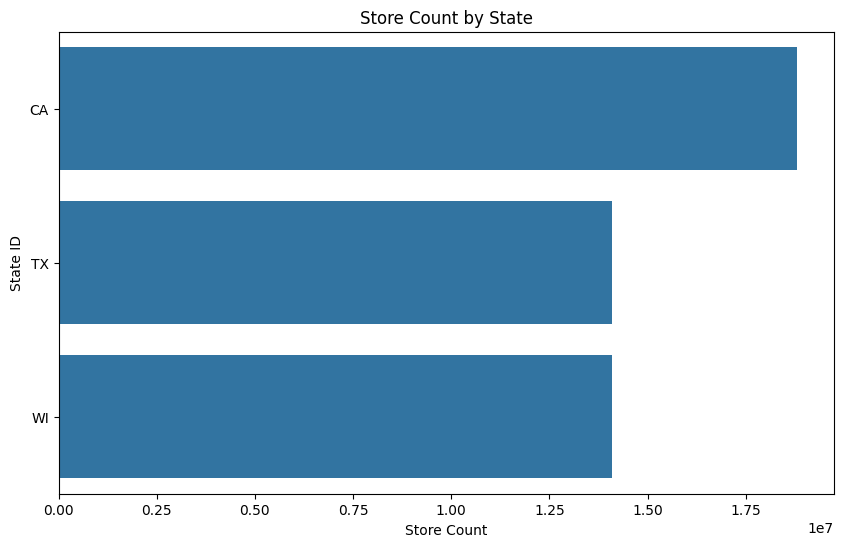

In [22]:
state_to_store = train_df[['state_id', 'store_id']].groupby('state_id').count()
state_to_store['store_count'] = state_to_store['store_id']
plt.figure(figsize=(10, 6))  # Set plot size
sns.barplot(y=state_to_store.index, x=state_to_store['store_count'])  # Swap x and y for horizontal
plt.title('Store Count by State')
plt.ylabel('State ID')
plt.xlabel('Store Count')
plt.show()

The graph below reveals the total sales revenue generated from different states throughout the years with California in the lead, followed by Texas and Wisconsin.


/var/folders/y7/4mw_ll2n3zz0kzg7v6kt7kwm0000gn/T/ipykernel_34108/729246929.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x_col, y=y_col, data=df, palette=palette)


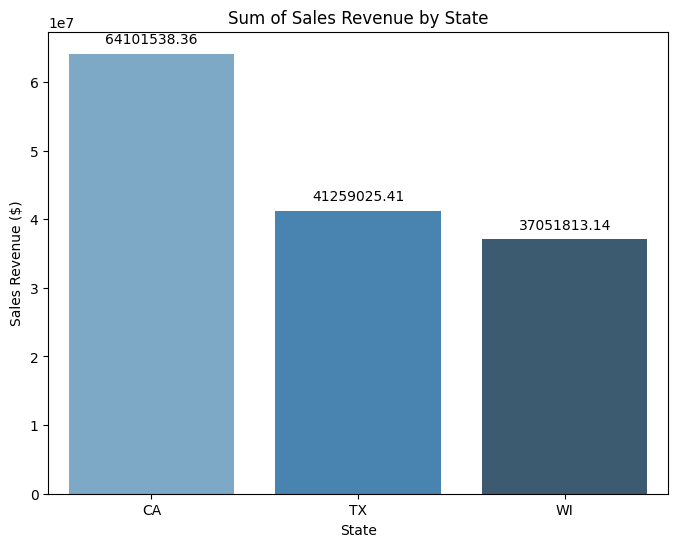

In [37]:
state_sales = train_df.groupby('state_id')['sales_revenue'].sum().reset_index()
generate_bargraph(state_sales, 'state_id', 'sales_revenue', 'Sum of Sales Revenue by State', 'State', 'Sales Revenue ($)')

The graph depicts the record of sales revenue over the years. It is evident that 2011 was the year with highest sales revenue for all the stores and then a decline trend in a sales revenue can be observed till 2014. After 2014, the sales revenue takes a turn from the decline to an uptrend for TX and WI, except for CA.

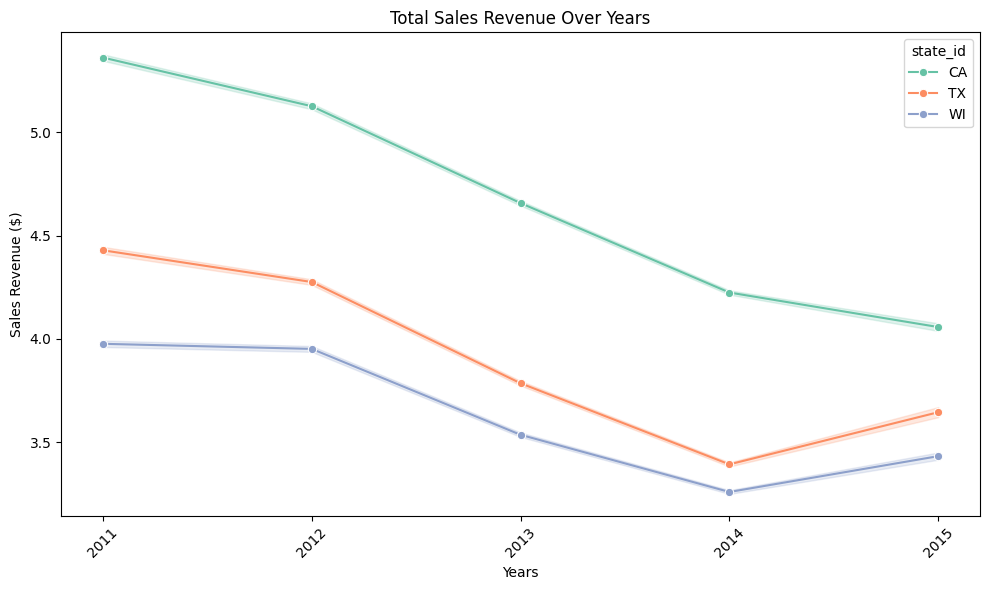

In [54]:
df_with_years = train_df.copy()
df_with_years['year'] = pd.to_datetime(df_with_years['date']).dt.year
generate_linegraph_with_year(df_with_years, 'year', 'sales_revenue', 'state_id', 'Total Sales Revenue Over Years', 'Years', 'Sales Revenue ($)')

The pie chart below shows the distribution of categories of items present in a store. Foods related products hold the majority followed by household and hobbies.

#### Store ID

CA_3 store performs the best in California, TX_2 in Texas and WI_3 in Wisconsin.


/var/folders/y7/4mw_ll2n3zz0kzg7v6kt7kwm0000gn/T/ipykernel_34108/729246929.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x_col, y=y_col, data=df, palette=palette)


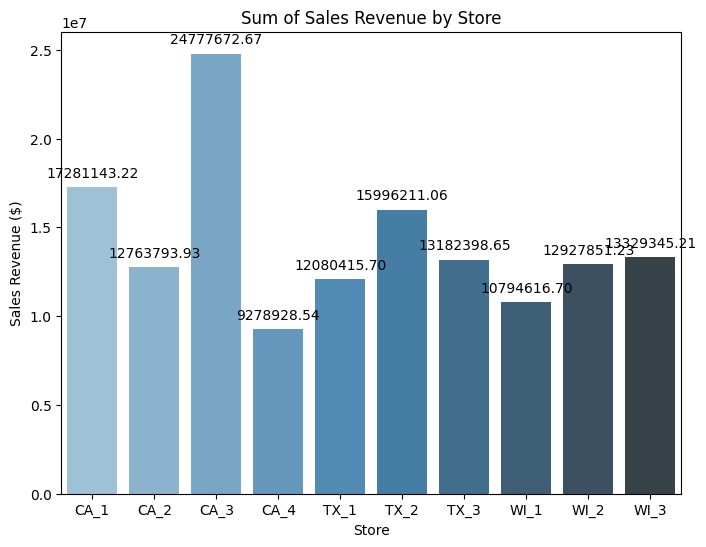

In [57]:
store_sales = train_df.groupby('store_id')['sales_revenue'].sum().reset_index()
generate_bargraph(store_sales, 'store_id', 'sales_revenue', 'Sum of Sales Revenue by Store', 'Store', 'Sales Revenue ($)')

The performance of all the stores throughout the years can be seen through the line graph

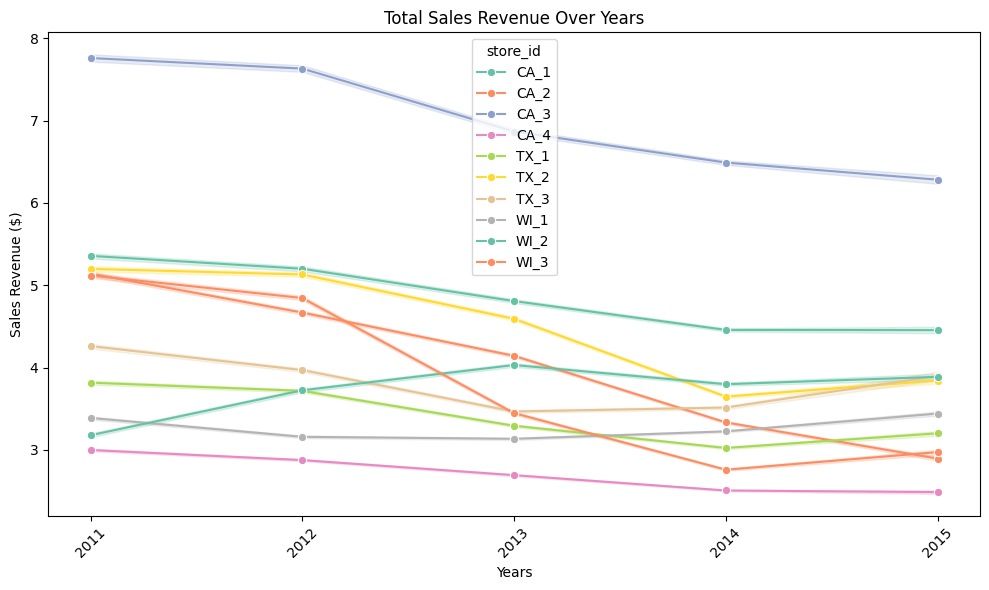

In [59]:
generate_linegraph_with_year(df_with_years, 'year', 'sales_revenue', 'store_id', 'Total Sales Revenue Over Years', 'Years', 'Sales Revenue ($)')

#### Category ID

The majority of the items belong to food category. 

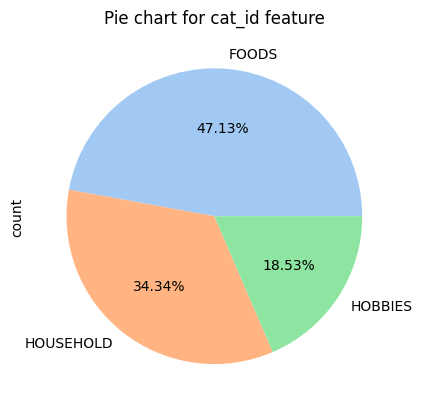

In [235]:
create_pie_chart(train_df, 'cat_id')

In [62]:
group_price_cat = train_df.groupby(['store_id','cat_id','item_id'],as_index=False)['sell_price'].mean().dropna()

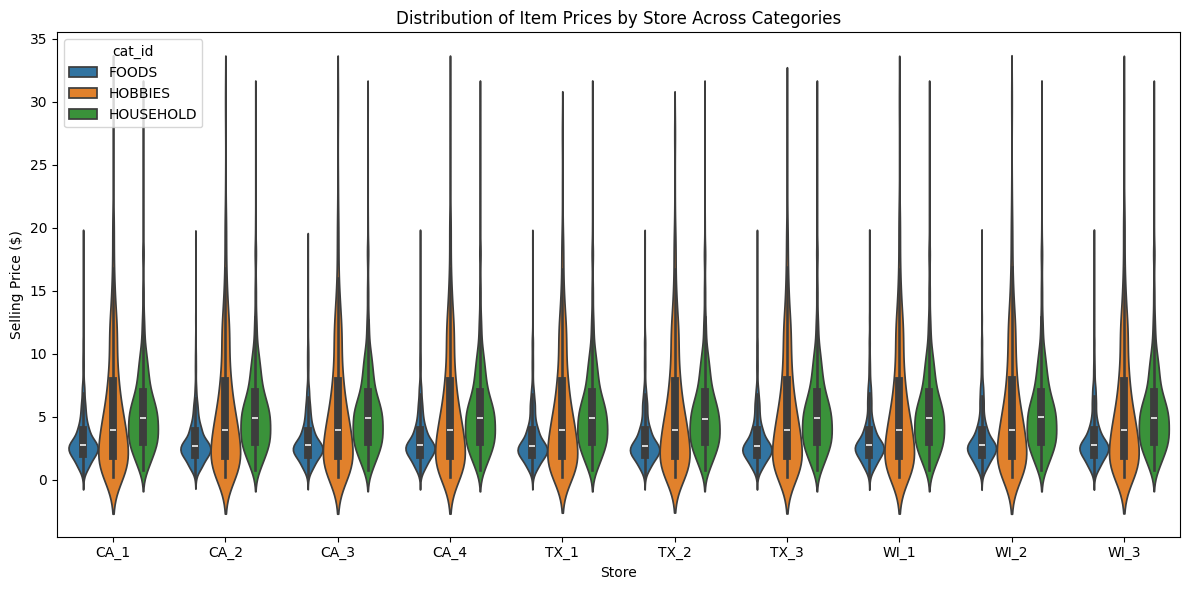

In [63]:
create_violin_plot(
    group_price_cat,
    x_col='store_id',
    y_col='sell_price',
    hue_col='cat_id',
    title='Distribution of Item Prices by Store Across Categories',
    xlabel='Store',
    ylabel='Selling Price ($)',
    box_plot=True
)

#### Department ID

The highest revenue is generated from the FOODS_3 department.

/var/folders/y7/4mw_ll2n3zz0kzg7v6kt7kwm0000gn/T/ipykernel_34108/729246929.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x_col, y=y_col, data=df, palette=palette)


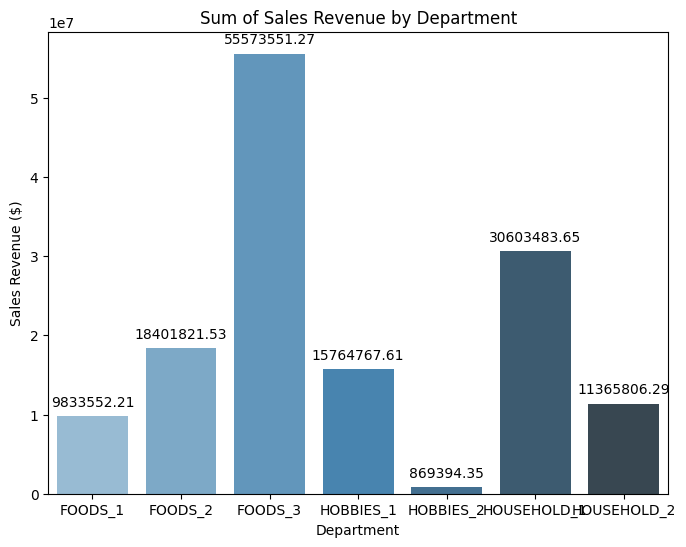

In [65]:
dept_sales = train_df.groupby('dept_id')['sales_revenue'].sum().reset_index()
generate_bargraph(dept_sales, 'dept_id', 'sales_revenue', 'Sum of Sales Revenue by Department', 'Department', 'Sales Revenue ($)')

### Missing Values

Searching for missing values in both train and test sets.

In [71]:
missing_values_summary(train_df)

,Missing Values,% Missing Values
sell_price,12264399,26.1
sales_revenue,12264399,26.1


In [72]:
missing_values_summary(test_df)

,Missing Values,% Missing Values
sell_price,35014,0.3
sales_revenue,35014,0.3


In [77]:
df_check = train_df[train_df['sell_price'].isnull()]['units_sold']
df_check.value_counts()

units_sold
0    12264399
Name: count, dtype: int64

The selling price of an item could be missing due to the possibility of the item not being sold during that week/day. This is verified above by checking the number of units sold where selling price is null. Therefore these values will be removed.

### Data cleaning

Creating a data cleaning pipeline to reduce code content as this will be applied to both train and test set. The steps involved are:
1. Creating a transformer class.
2. Input Parameters: Defined the input parameters such as datetime_col variable and a list of columns that need to be removed.
3. Drop missing values
4. Extract year, month and day from datetime column.
5. Drop unwanted columns.

In [252]:
class DataCleaningTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, datetime_col='date', cols_to_remove=None):
        if cols_to_remove == None:
            cols_to_remove = ['id', 'date', 'wm_yr_wk', 'sell_price', 'd', 'units_sold']
            
        self.datetime_col = datetime_col
        self.cols_to_remove = cols_to_remove

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        
        # Dropping null values that exist in the sell price and sales revenue
        X_copy.dropna(inplace=True)

        # Exapnding date column to day, month and year
        if self.datetime_col in X_copy.columns:
            X_copy['year'] = pd.to_datetime(X_copy[self.datetime_col]).dt.year
            X_copy['month'] = pd.to_datetime(X_copy[self.datetime_col]).dt.month
            X_copy['day'] = pd.to_datetime(X_copy[self.datetime_col]).dt.day

        # Dropping unwanted columns
        X_copy.drop(columns=self.cols_to_remove, inplace=True)

        return X_copy

In [253]:
preprocessing_pipeline = Pipeline(steps=[
    ('data_cleaning', DataCleaningTransformer(datetime_col='date'))
])

In [254]:
train_df_cleaned = preprocessing_pipeline.fit_transform(train_df)
train_df_cleaned.head(10)

,item_id,dept_id,cat_id,store_id,state_id,sales_revenue,year,month,day
7,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,5.52,2011,1,29
8,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,3.12,2011,1,29
9,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,0.00,2011,1,29
11,HOBBIES_1_012,HOBBIES_1,HOBBIES,CA_1,CA,0.00,2011,1,29
14,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,2.80,2011,1,29
15,HOBBIES_1_016,HOBBIES_1,HOBBIES,CA_1,CA,3.50,2011,1,29
21,HOBBIES_1_022,HOBBIES_1,HOBBIES,CA_1,CA,13.72,2011,1,29
22,HOBBIES_1_023,HOBBIES_1,HOBBIES,CA_1,CA,6.88,2011,1,29
27,HOBBIES_1_028,HOBBIES_1,HOBBIES,CA_1,CA,0.00,2011,1,29
28,HOBBIES_1_029,HOBBIES_1,HOBBIES,CA_1,CA,14.88,2011,1,29


In [255]:
train_df_cleaned.shape

(34720691, 9)

In [258]:
test_df_cleaned = preprocessing_pipeline.fit_transform(test_df)
test_df_cleaned.head(10)

,item_id,dept_id,cat_id,store_id,state_id,sales_revenue,year,month,day
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0.00,2015,4,19
1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0.00,2015,4,19
2,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0.00,2015,4,19
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,18.56,2015,4,19
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,8.64,2015,4,19
5,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,2.00,2015,4,19
6,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,7.88,2015,4,19
7,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,1.92,2015,4,19
8,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,0.00,2015,4,19
9,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,8.91,2015,4,19


In [259]:
test_df_cleaned.shape

(12160986, 9)

## Saving Files

In [262]:
folder_path = "../../data/interim"
train_df_cleaned.to_csv(os.path.join(folder_path, 'train_data_cleaned.csv'), index=False)
test_df_cleaned.to_csv(os.path.join(folder_path, 'test_data_cleaned.csv'), index=False)

In [4]:
folder_path = "../../data/processed"
calendar_events.to_csv(os.path.join(folder_path, 'calendar_events.csv'), index=False)

Creating 'item_id.json' file with list of item id that will be used while creating a selectbox for item id in the stream lit app.

In [27]:
file_path = "../../data/external/item_ids.json"
with open(file_path, 'w') as json_file:
    json.dump(distinct_items_dict, json_file)